#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

## # Import Required Libraries:

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load the feature store dataset as dataframe

file_path = r"wafer_23012020_041211.csv"
wafers = pd.read_csv(file_path)
print("Shape of the feature store dataset: ", wafers.shape)
wafers.head()

Shape of the feature store dataset:  (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
## Train-Test Split
from sklearn.model_selection import train_test_split
wafers,wafers_test = train_test_split(wafers,test_size=.20,random_state=69)

In [4]:
## Wafers' Info

wafers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 36 to 54
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [5]:
## Description of `wafers`
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,77.000000,77.000000,77.000000,77.0,77.000000,77.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.927975,2487.509750,2201.357012,1465.715219,1.156362,100.0,97.511971,0.122187,1.458087,-0.000283,...,76.923281,0.499018,0.013724,0.003586,2.751294,0.024475,0.015671,0.004902,80.692579,-0.925000
std,76.743134,66.904189,25.986581,443.929251,0.323646,0.0,5.292591,0.001851,0.069961,0.010773,...,43.377176,0.003379,0.004602,0.000927,0.928930,0.012502,0.007541,0.002527,58.453766,0.382364
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.008100,0.002400,1.618000,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2970.425000,2448.380000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.007375,...,47.847700,0.496700,0.011300,0.003100,2.276800,0.013300,0.009500,0.002800,33.787600,-1.000000
50%,3006.950000,2497.215000,2200.955600,1242.842000,1.162000,100.0,99.292200,0.122000,1.452900,0.000600,...,65.218600,0.499250,0.012700,0.003350,2.516300,0.021800,0.013900,0.004200,62.059500,-1.000000
75%,3072.640000,2526.442500,2212.866700,1942.306900,1.339300,100.0,101.457800,0.123400,1.496850,0.007650,...,101.929700,0.501325,0.014525,0.003800,2.932100,0.028225,0.019300,0.006000,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.141500,100.0,104.885600,0.126200,1.641100,0.019800,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


In [6]:
## Looking at the Target feature

wafers["Good/Bad"].value_counts()

Good/Bad
-1    77
 1     3
Name: count, dtype: int64

## Insights:
Heavily imbalanced. Definitwly have to do `resampling`

## # Analyze Missing Data:

1. Drop the records with missing data.
2. If there are missing Target Feature values, we will have to delete the records, for others we can use imputation.

In [7]:
## Check missing values in Target Feature
wafers["Good/Bad"].isna().sum()

0

In [8]:
## Check missing values in Independent Feature
print(f"{(wafers.isna().sum().sum() / (wafers.shape[0] * (wafers.shape[1]-1))) * 100:.4f}%")

4.0482%


Aprox. 4% of data is missing.
We're going to try various imputation strategies and choose the that gives us least overall-error-value.

## # Visualization of Sensors' Distribution

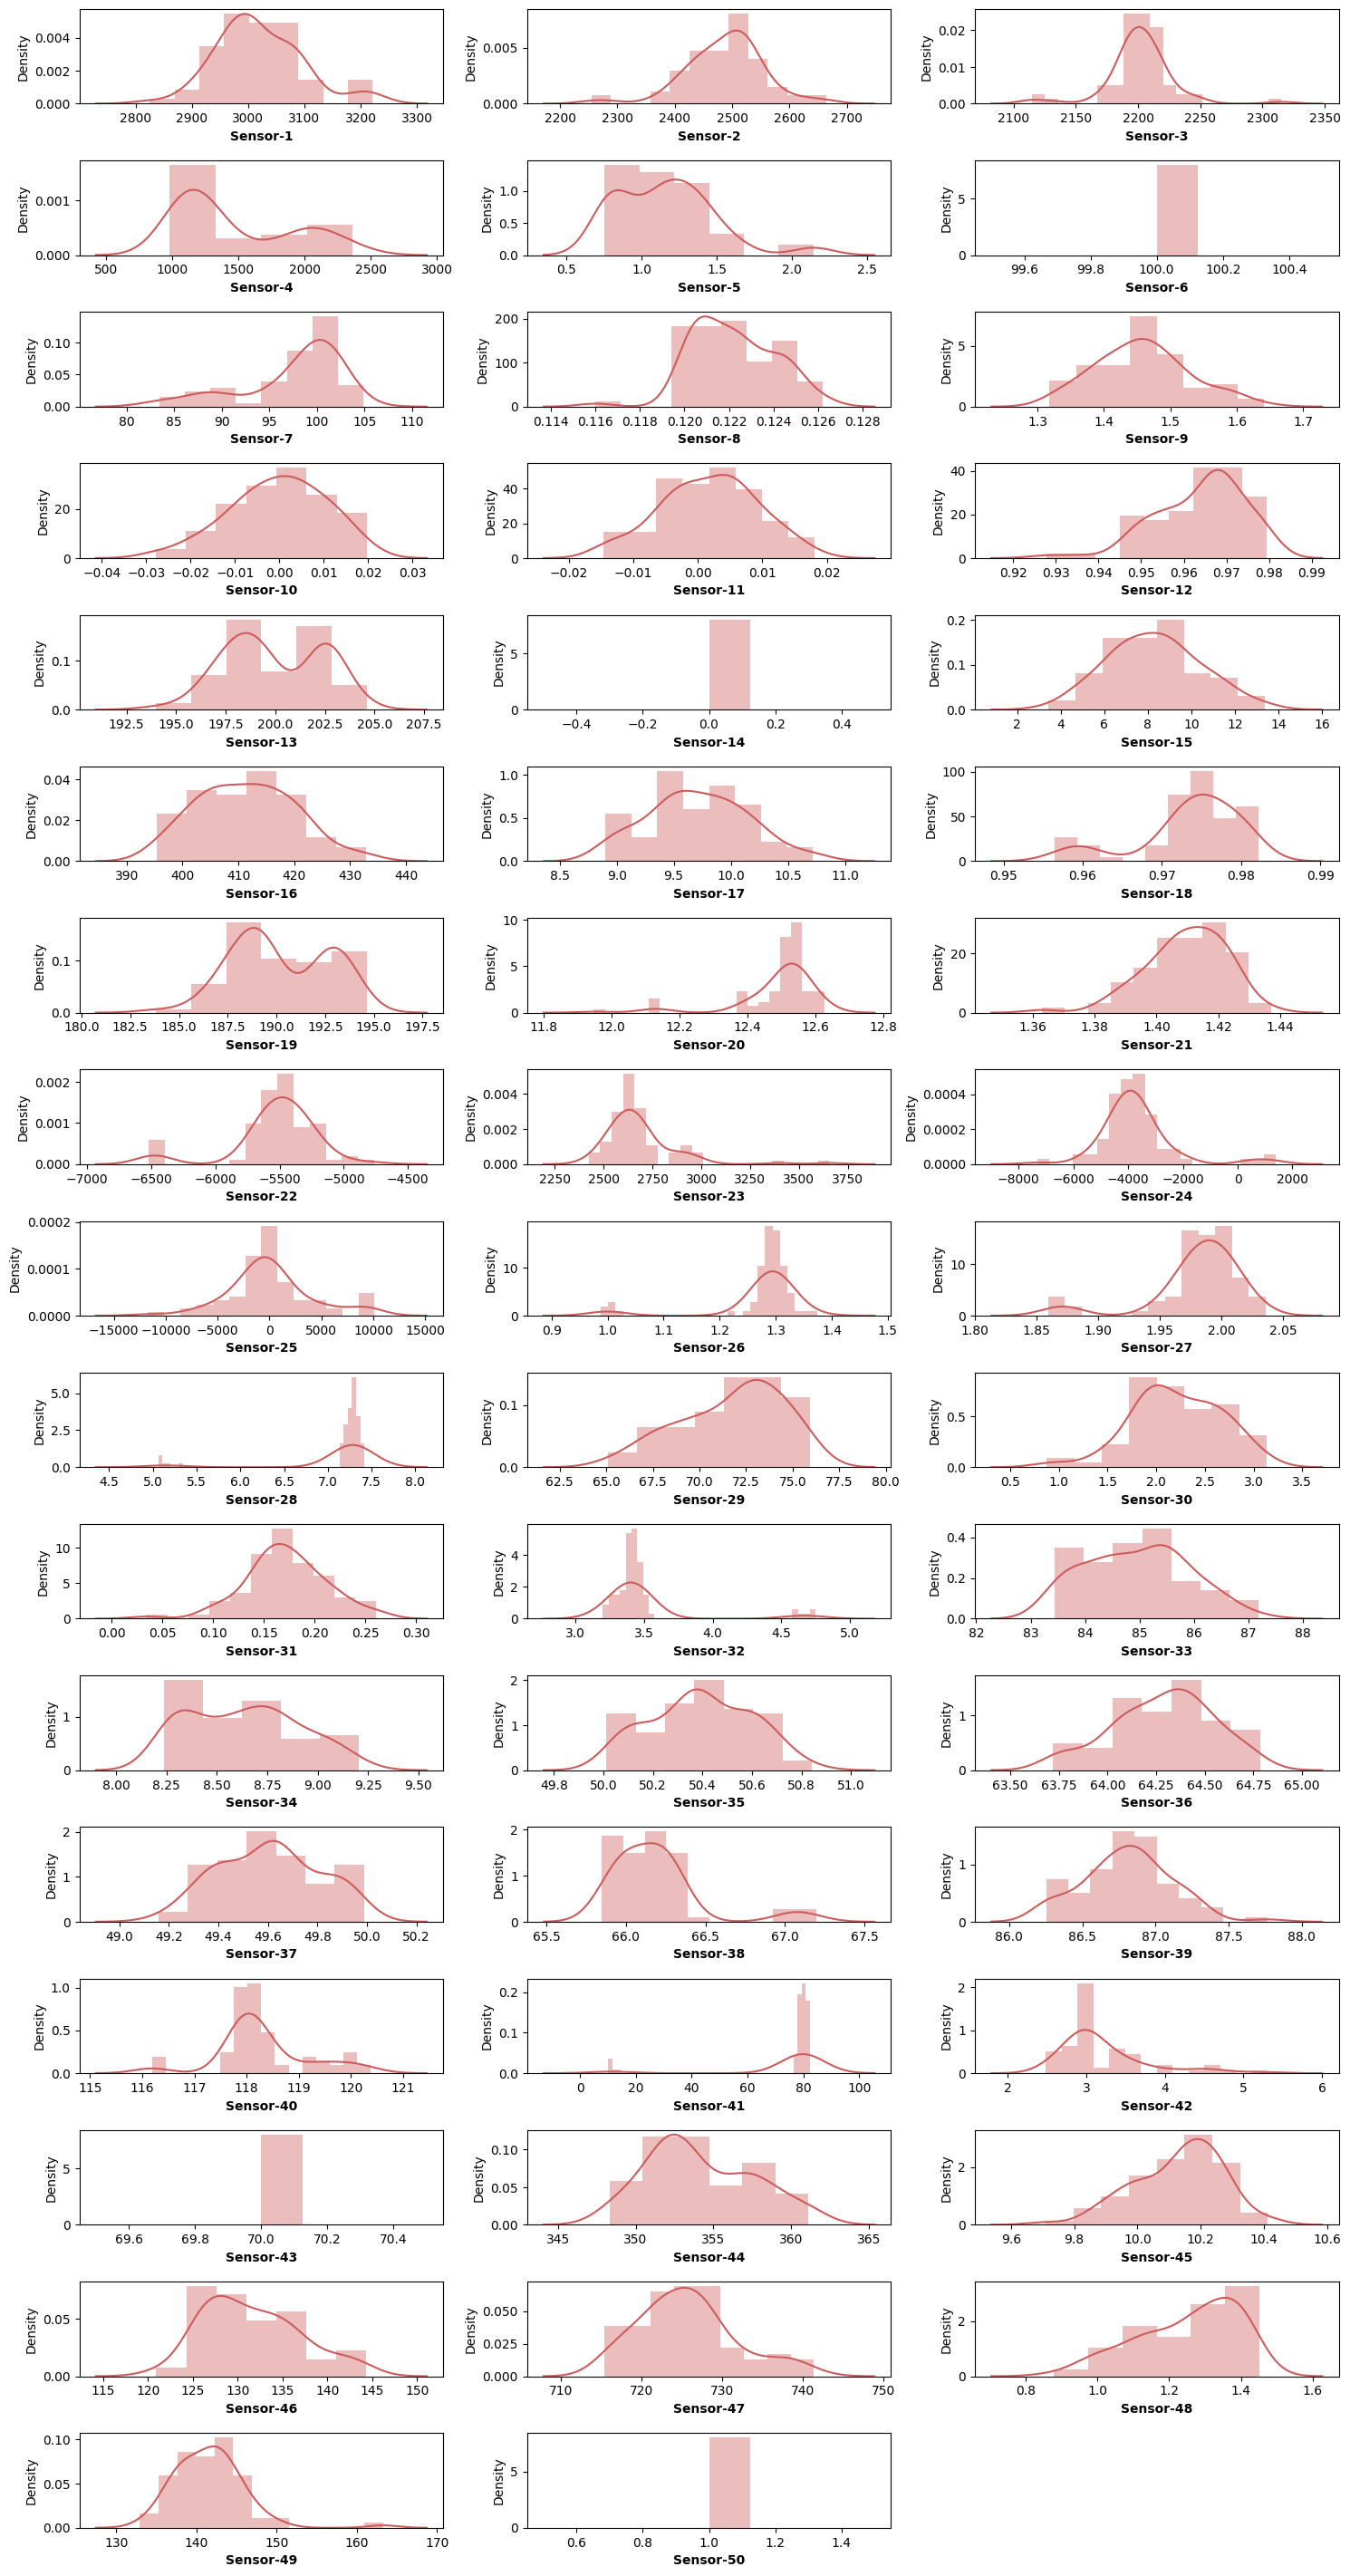

In [9]:
# Let's look at the Distribution of the first 50 sensors of Wafers

plt.figure(figsize=(15,100))

for i,col in enumerate(wafers.columns[1:51]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [10]:
## Select 50 Sensors Randomly

random_50_sensors_idx = []
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1,wafers.shape[1]))

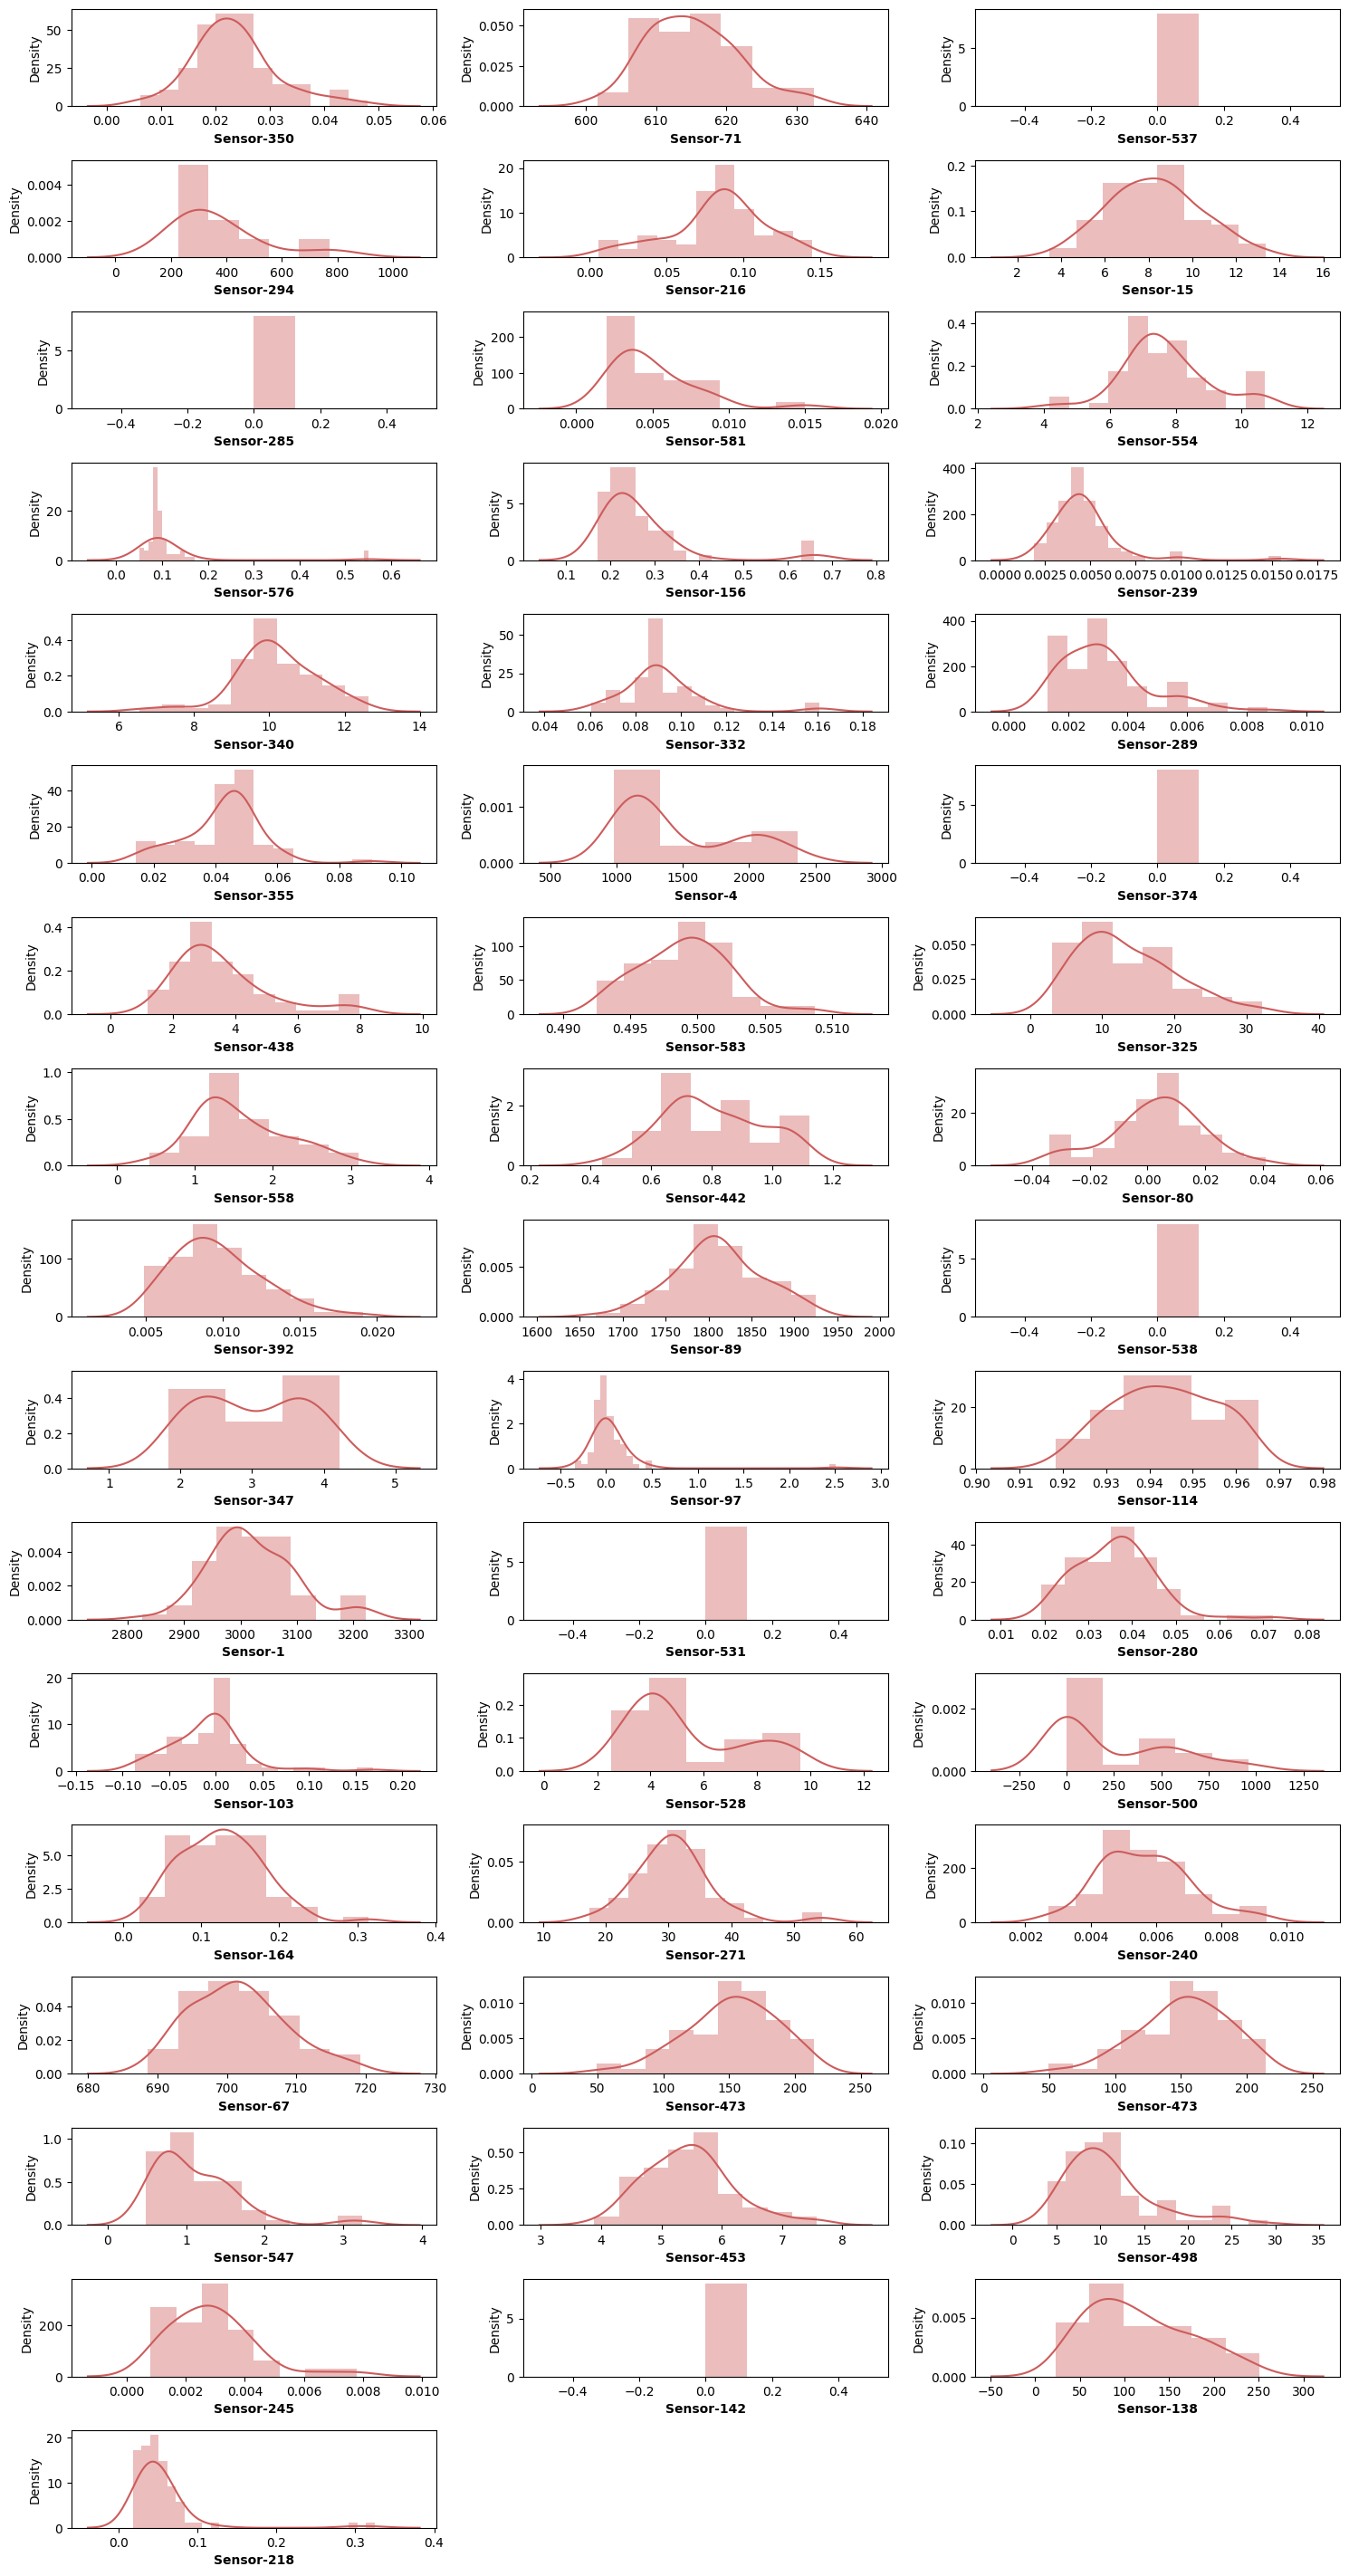

In [11]:
# Let's now have a look at these randomly selected Sensors' Distribution

plt.figure(figsize=(15,100))

for i,col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

### Insight:

Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It is not possible to analyze each feature and deal with its outliers individually, thus we should depend upon the scaling. 

For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

### # Get Columns to Drop:

We'll drop columns with zero standard deviation as they are not influencing the target variable in any way.

In [12]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O'] ## Selecting numerical columns only
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame,missing_thresh=.7):
    """
    Return a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios>missing_thresh].index)
    return cols_to_drop

In [ ]:
## Columns with missing values more than 70%

cols_to_drop_1 = get_redundant_cols(wafers)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [14]:
## Columns with 0 Standard Deviation

cols_to_drop_2 = get_cols_with_zero_std_dev(wafers)
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-115',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-250',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Se

Features that are not gonna contribute to ML algorithm in anyway, whatsoever.

In [15]:
cols_to_drop = cols_to_drop_1+cols_to_drop_2
cols_to_drop = list(set(cols_to_drop))
cols_to_drop.append(wafers.columns[0])
len(cols_to_drop)

131

## # Seperate Features and Labels out:

In [16]:
X,y = wafers.drop(cols_to_drop,axis=1),wafers[["Good/Bad"]]

print("Shape of the Indpendent Features : ",X.shape)
print("Shape of the Dependent / Target Feature : ",y.shape)

Shape of the Indpendent Features :  (80, 461)
Shape of the Dependent / Target Feature :  (80, 1)


# # Data Transformation:

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[('Imputer',imputer),('Scaler',RobustScaler())]
)
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [18]:
# Transfrom "Wafers" features

X_trans = preprocessing_pipeline.fit_transform(X)
print("Shape of transformed features set: ",X_trans.shape)
X_trans

Shape of transformed features set:  (80, 461)


array([[-0.25715379, -0.05361089,  0.34884597, ...,  1.40625   ,
        -0.04221749,  0.        ],
       [-0.65671356,  0.03157726, -3.91851778, ...,  0.09375   ,
         0.04479989,  0.        ],
       [-0.02794526,  0.51811049,  0.4451999 , ..., -0.125     ,
         0.74066096,  0.        ],
       ...,
       [-1.73193607, -2.70456365,  0.42249847, ..., -0.6875    ,
        -0.53044566,  0.        ],
       [-0.55574696,  0.37117694,  0.70500407, ..., -0.1875    ,
        -0.10754186,  0.        ],
       [ 0.47506938, -0.42036829,  0.49060275, ..., -0.125     ,
         0.59907   ,  0.        ]])

# # Shall we cluster "Wafers" instances?

Let's see whether clustering of data instances do us any good.

In [21]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass

@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.
    
    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """

    X: np.array
    desc:str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dipersal point in number of clusters vs WCSS plot.
        
        Raises:
            e: Raises relevant exception should any kind of error happens while determining the 
            ideal number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances shoud be divided into.
        """

        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..'
            )
            ############## Compute WCSS for shorlisted number of clusters ###########################
            print("computing WCSS for shortlisted number of clusters..")
            WCSS = [] # Within Summation of Squares
            for i in range(1,11):
                kmeans = KMeans(n_clusters=i,init='k-means++',random_state=69)
                kmeans.fit(self.X)
                WCSS.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!"
            )

            ############## Finalize dispersal point as the ideal number of clusters #################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method.."
            )
            knee_finder = KneeLocator(
                range(1,11),WCSS,curve='convex',direction='decreasing'
            )
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}"
            )

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e
        
    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand should've been divided into
        via offcourse Kmeans Clustering algorithm.
        
        Raises:
            e: Raises relevant exception should any kind of error happens while dividing the given data instances 
            into clusters.
            
        Returns:
            (KMeans,np.array): Kmeans Clustering object being used to cluster the given data instances and the given daraset
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm.."
            )
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++',random_state=69)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!"
            )

            return kmeans, np.c_[self.X,y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e




In [22]:
## Cluster `Wafer` instances

cluster_wafers = ClusterDataInstances(X=X_trans, desc="Wafers Features")
clusterer, X_clus = cluster_wafers.create_clusters()
X_clus

Getting the ideal number of clusters to cluster "Wafers Features set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1: 486896.76058542205
WCSS for n_clusters=2: 159877.73560290766
WCSS for n_clusters=3: 113579.81578784958
WCSS for n_clusters=4: 87753.96101580358
WCSS for n_clusters=5: 71443.44986310089
WCSS for n_clusters=6: 56526.862611380304
WCSS for n_clusters=7: 51953.44608917342
WCSS for n_clusters=8: 45749.414903353856
WCSS for n_clusters=9: 42573.57954255333
WCSS for n_clusters=10: 38407.39685713922
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 2
Dividing the "Wafers Features" instances into 2 clusters via KMeans Clustering algorithm..
..said data instances divided into 2 clusters successfully!


array([[-0.25715379, -0.05361089,  0.34884597, ..., -0.04221749,
         0.        ,  0.        ],
       [-0.65671356,  0.03157726, -3.91851778, ...,  0.04479989,
         0.        ,  0.        ],
       [-0.02794526,  0.51811049,  0.4451999 , ...,  0.74066096,
         0.        ,  0.        ],
       ...,
       [-1.73193607, -2.70456365,  0.42249847, ..., -0.53044566,
         0.        ,  0.        ],
       [-0.55574696,  0.37117694,  0.70500407, ..., -0.10754186,
         0.        ,  0.        ],
       [ 0.47506938, -0.42036829,  0.49060275, ...,  0.59907   ,
         0.        ,  0.        ]])

In [23]:
## Clusters 

np.unique(X_clus[:,-1])

array([0., 1.])

The dataset was divided into two optimal clusters

In [ ]:
## 